### Regression on time series data

#### Bitcoin Price Prediction using Regression

In [36]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Loading the data
data = pd.read_csv('BTC-Daily.csv')

data.head(10)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
5,1645660800,2022-02-24 00:00:00,BTC/USD,37253.26,39720.00,34324.05,38376.88,6302.850957,2.418838e+08
6,1645574400,2022-02-23 00:00:00,BTC/USD,38269.94,39303.24,37060.16,37274.18,1778.275258,6.628375e+07
7,1645488000,2022-02-22 00:00:00,BTC/USD,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07
8,1645401600,2022-02-21 00:00:00,BTC/USD,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08
9,1645315200,2022-02-20 00:00:00,BTC/USD,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07


In [38]:
data.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [39]:
df = data.iloc[:1000]

In [40]:
# Splitting the date-time column into separate date and time columns
df[['date', 'time']] = df['date'].apply(lambda x: pd.Series(x.split(' ', 1)))
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,time
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,00:00:00
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,00:00:00
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,00:00:00
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,00:00:00
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,00:00:00


In [41]:
df.shape

(1000, 10)

In [42]:
# Convert 'date' column to datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Set 'date' column as index
df.set_index('date', inplace=True)

# Drop unnecessary columns
df.drop(['unix','high','low','symbol', 'Volume BTC', 'Volume USD', 'time'], axis=1, inplace=True)

# Check the dataset
print(df.head())

                open     close
date                          
2022-03-01  43221.71  43185.48
2022-02-28  37717.10  43178.98
2022-02-27  39146.66  37712.68
2022-02-26  39242.64  39146.66
2022-02-25  38360.93  39231.64


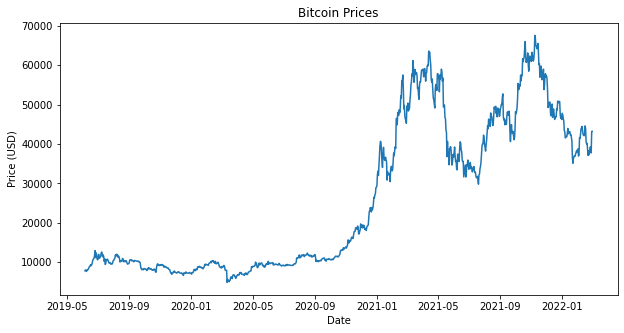

In [43]:
# Visualizing the BTC prices from the dataset 
plt.figure(figsize=(10,5))
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df['close'])
plt.show()

In [44]:
# Define input and output variables
X = df.drop(['close'], axis=1)
# X = df['unix'] 
y = df['close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model using the training set
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Make predictions using the test set
y_pred = lr_model.predict(X_test)

In [47]:
# Calculating RMSE, R^2 and Adj R^2 of the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
n = X.shape[0]
p = X.shape[1]
adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))
print("Adj R-squared: {:.2f}".format(adj_r_squared))

RMSE: 1305.35
R-squared: 0.99
Adj R-squared: 0.99


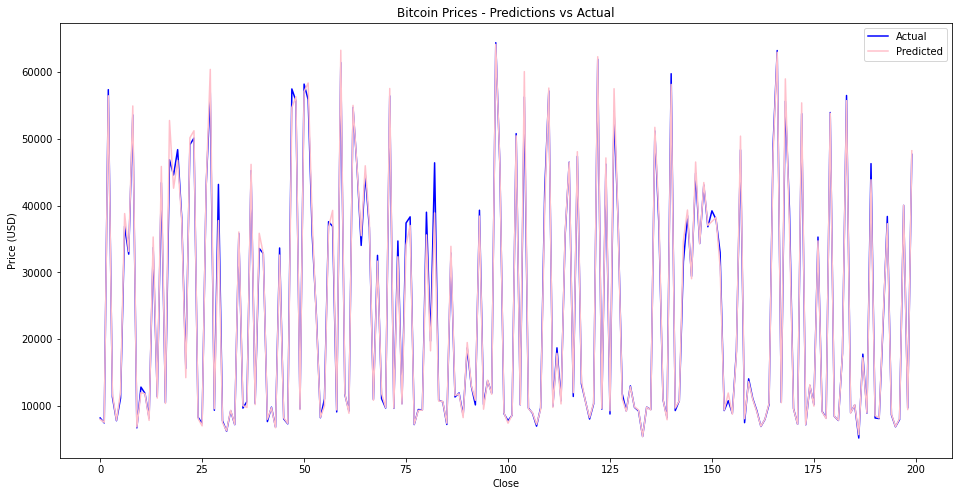

In [48]:
# Plotting Actual Prices vs Predicted Prices
plt.figure(figsize=(16,8))
plt.title('Bitcoin Prices - Predictions vs Actual')
plt.xlabel('Close')
plt.ylabel('Price (USD)')
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='pink')
plt.legend()
plt.show()

In [49]:
actual_prices = pd.DataFrame(y_test)
actual_prices.reset_index(inplace=True)

prediction_prices = pd.DataFrame(y_pred, columns=['predictions'])

In [50]:
# Comparing the prices in a dataframe and sorting
comparision = pd.merge(actual_prices, prediction_prices, left_index=True, right_index=True)
comparision = comparision.sort_values(by='date')
comparision = comparision.reset_index()
comparision = comparision[['date','close','predictions']]

In [51]:
comparision.head(5)

,date,close,predictions
0,2019-06-06,7806.07,7830.795913
1,2019-06-09,7632.99,7979.321324
2,2019-06-12,8176.27,7961.854216
3,2019-06-15,8857.19,8740.765265
4,2019-06-16,8974.19,8903.188375


In [52]:
c = comparision.copy()

In [53]:
c.set_index('date', inplace=True)

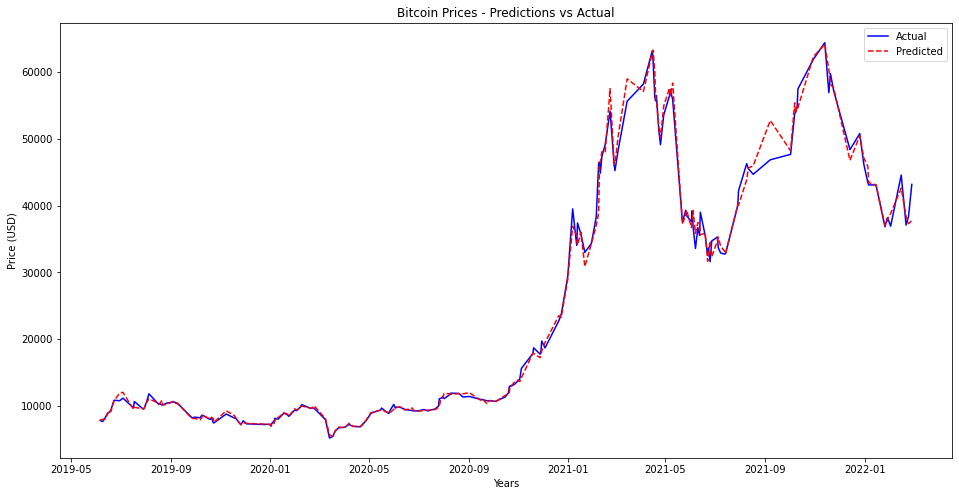

In [54]:
# Plotting Actual Prices vs Predicted Prices (All Time)
plt.figure(figsize=(16,8))
plt.title('Bitcoin Prices - Predictions vs Actual')
plt.xlabel('Years')
plt.ylabel('Price (USD)')
plt.plot(c['close'], label='Actual', color='blue')
plt.plot(c['predictions'], ls='--', label='Predicted', color='red')
plt.legend()
plt.show()

In [55]:
# Create a date range
start_date = '2021-01-01'
end_date = '2022-03-31'
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the DataFrame using boolean indexing with loc
fc = comparision.loc[comparision['date'].isin(date_range)]

In [56]:
fc.set_index('date', inplace=True)

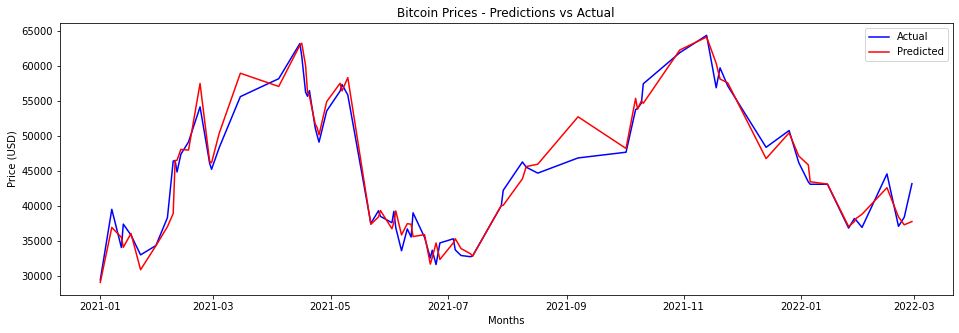

In [57]:
# Plotting Actual Prices vs Predicted Prices (Timeframe)
plt.figure(figsize=(16,5))
plt.title('Bitcoin Prices - Predictions vs Actual')
plt.xlabel('Months')
plt.ylabel('Price (USD)')
plt.plot(fc['close'], label='Actual', color='blue')
plt.plot(fc['predictions'], label='Predicted', color='red')
plt.legend()
plt.show()

#### Predicting Bitcoin prices for future dates Polynomial Regression

In [134]:
# Splitting the date-time column into separate date and time columns
data[['date', 'time']] = data['date'].apply(lambda x: pd.Series(x.split(' ', 1)))
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time

data = data.drop('time', axis=1)
data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [135]:
# Extract the features and target variable
X1 = data['unix'].values.reshape(-1, 1) 
y1 = data['close'].values

In [136]:
# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [137]:
# Fit a polynomial regression model with degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)
lr_model.fit(X_train_poly, y1_train)

LinearRegression()

In [138]:
# Make predictions on the test set
y1_pred = lr_model.predict(X_test_poly)

In [144]:
# Generate sequence of Unix timestamps for the next 365 days
future_dates = pd.date_range(start='2022-03-02', end='2023-03-07')
future_dates_unix = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
future_dates_unix = future_dates_unix.values.reshape(-1, 1)

# Transform future dates into polynomial features
future_dates_poly = poly.transform(future_dates_unix)

# Predict Bitcoin prices for the next 365 days
future_prices = lr_model.predict(future_dates_poly)

# Print predicted prices for future dates
for date, price in zip(future_dates, future_prices):
    print("{}: {:.2f}".format(date, price))

2022-03-02 00:00:00: 49977.06
2022-03-03 00:00:00: 50031.86
2022-03-04 00:00:00: 50086.69
2022-03-05 00:00:00: 50141.55
2022-03-06 00:00:00: 50196.44
2022-03-07 00:00:00: 50251.36
2022-03-08 00:00:00: 50306.31
2022-03-09 00:00:00: 50361.30
2022-03-10 00:00:00: 50416.31
2022-03-11 00:00:00: 50471.36
2022-03-12 00:00:00: 50526.44
2022-03-13 00:00:00: 50581.55
2022-03-14 00:00:00: 50636.69
2022-03-15 00:00:00: 50691.87
2022-03-16 00:00:00: 50747.07
2022-03-17 00:00:00: 50802.31
2022-03-18 00:00:00: 50857.57
2022-03-19 00:00:00: 50912.87
2022-03-20 00:00:00: 50968.20
2022-03-21 00:00:00: 51023.56
2022-03-22 00:00:00: 51078.95
2022-03-23 00:00:00: 51134.38
2022-03-24 00:00:00: 51189.83
2022-03-25 00:00:00: 51245.32
2022-03-26 00:00:00: 51300.84
2022-03-27 00:00:00: 51356.39
2022-03-28 00:00:00: 51411.97
2022-03-29 00:00:00: 51467.58
2022-03-30 00:00:00: 51523.23
2022-03-31 00:00:00: 51578.90
2022-04-01 00:00:00: 51634.61
2022-04-02 00:00:00: 51690.35
2022-04-03 00:00:00: 51746.12
2022-04-04

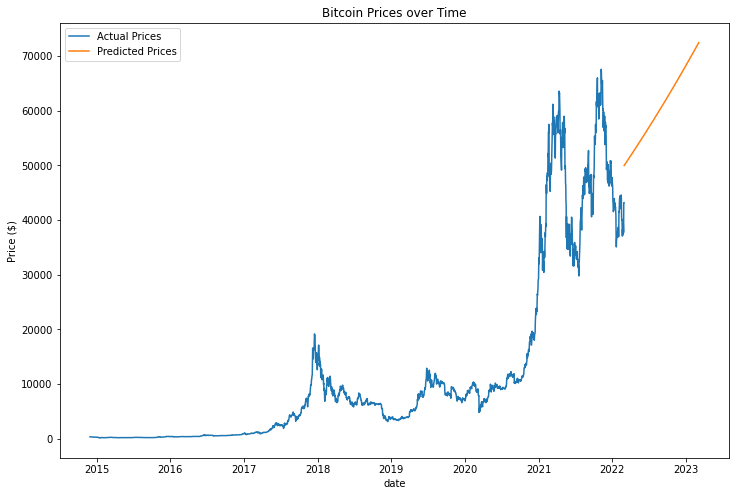

In [150]:
# Plot the predicted prices
plt.figure(figsize=(12,8))
plt.plot(data['date'], data['close'], label='Actual Prices')
plt.plot(future_dates, future_prices, label='Predicted Prices')
plt.xlabel('date')
plt.ylabel('Price ($)')
plt.title('Bitcoin Prices over Time')
plt.legend()
plt.show()

In [147]:
# Calculating RMSE, R^2 and Adj R^2 of the model
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y1_test, y1_pred, squared=False)
r2 = r2_score(y1_test, y1_pred)
n = X.shape[0]
p = X.shape[1]
adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("RMSE: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))
print("Adj R-squared: {:.2f}".format(adj_r_squared))

RMSE: 7357.25
R-squared: 0.78
Adj R-squared: 0.78
